In [1]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
import altair as alt
from vega_datasets import data

#defining paths
allAlgorithms_unigram_900terms = './boxplot.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


dataBinary = pd.read_csv(allAlgorithms_unigram_900terms)
#dataClassifier = pd.read_csv(classifierChain)

In [2]:
dataBinary

date_time  tf-IDF  #_TopTerms Stop_Word  Train/Test_Size Algorithm  \
0    58:19.9  (1, 1)         900       Yes              0.2  Baseline   
1    58:21.2  (1, 1)         900       Yes              0.2  Baseline   
2    58:22.6  (1, 1)         900       Yes              0.2  Baseline   
3    58:24.0  (1, 1)         900       Yes              0.2  Baseline   
4    58:25.3  (1, 1)         900       Yes              0.2  Baseline   
5    58:26.7  (1, 1)         900       Yes              0.2  Baseline   
6    58:28.1  (1, 1)         900       Yes              0.2  Baseline   
7    58:29.4  (1, 1)         900       Yes              0.2  Baseline   
8    58:30.9  (1, 1)         900       Yes              0.2  Baseline   
9    58:32.2  (1, 1)         900       Yes              0.2  Baseline   
10   28:26.9  (1, 1)        5967       Yes              0.2        H2   
11   28:29.2  (1, 1)        5967       Yes              0.2        H2   
12   28:31.6  (1, 1)        5967       Yes              0.2        H2   
13   28:34.0  (1, 1)        5967       Yes              0.2        H2   
14   28:36.3  (1, 1)        5967       Yes              0.2        H2   
15   28:38.6  (1, 1)        5967       Yes              0.2        H2   
16   28:41.1  (1, 1)        5967       Yes              0.2        H2   
17   28:43.7  (1, 1)        5967       Yes              0.2        H2   
18   28:46.0  (1, 1)        5967       Yes              0.2        H2   
19   28:48.4  (1, 1)        5967       Yes              0.2        H2   
20   11:46.3  (1, 1)        5878       Yes              0.2        H1   
21   11:48.7  (1, 1)        5878       Yes              0.2        H1   
22   11:51.1  (1, 1)        5878       Yes              0.2        H1   
23   11:53.4  (1, 1)        5878       Yes              0.2        H1   
24   11:55.6  (1, 1)        5878       Yes              0.2        H1   
25   11:57.8  (1, 1)        5878       Yes              0.2        H1   
26   12:00.0  (1, 1)        5878       Yes              0.2        H1   
27   12:02.2  (1, 1)        5878       Yes              0.2        H1   
28   12:04.3  (1, 1)        5878       Yes              0.2        H1   
29   12:06.5  (1, 1)        5878       Yes              0.2        H1   
30   32:43.6  (1, 1)       11456       Yes              0.2        H3   
31   32:46.5  (1, 1)       11456       Yes              0.2        H3   
32   32:49.2  (1, 1)       11456       Yes              0.2        H3   
33   32:52.0  (1, 1)       11456       Yes              0.2        H3   
34   32:54.6  (1, 1)       11456       Yes              0.2        H3   
35   32:57.4  (1, 1)       11456       Yes              0.2        H3   
36   33:00.2  (1, 1)       11456       Yes              0.2        H3   
37   33:02.9  (1, 1)       11456       Yes              0.2        H3   
38   33:05.7  (1, 1)       11456       Yes              0.2        H3   
39   33:08.6  (1, 1)       11456       Yes              0.2        H3   

    Accuracy_Score  Accuracy_Score_not_normalized  zero_one_loss    AUC-PR  \
0         0.161972                             23       0.838028  0.726639   
1         0.091549                             13       0.908451  0.654757   
2         0.091549                             13       0.908451  0.660442   
3         0.112676                             16       0.887324  0.669685   
4         0.154930                             22       0.845070  0.708615   
5         0.133803                             19       0.866197  0.692722   
6         0.105634                             15       0.894366  0.688532   
7         0.105634                             15       0.894366  0.620070   
8         0.105634                             15       0.894366  0.667117   
9         0.112676                             16       0.887324  0.634557   
10        0.119718                             17       0.880282  0.705855   
11        0.056338                              8       0.943662  0.65657

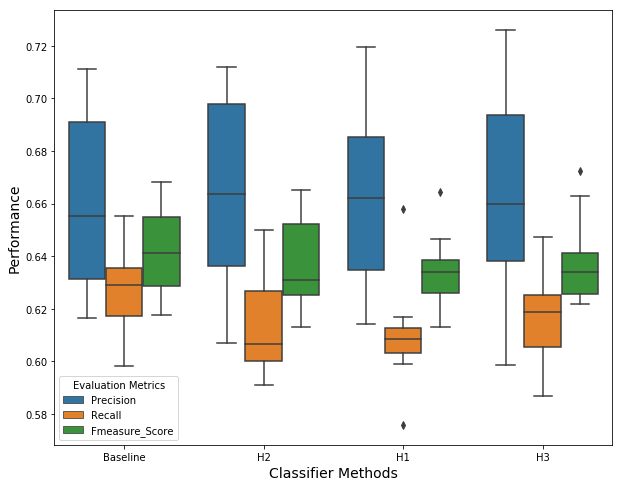

In [22]:
dd=pd.melt(dataBinary,id_vars=['Algorithm'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='Algorithm',data=dd,hue='Evaluation Metrics')
plt.ylabel("Performance", size=14)
plt.xlabel("Classifier Methods",size=14)

labels=["Precision", "Recall", "F-measure"]
#h, l = ax.get_legend_handles_labels()
#ax.legend(h, labels, title="Evaluation Metrics",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.title("Evaluation Metrics by Hypothesis", size=12)
plt.savefig("H1H2H3Baseline-comparison.pdf")
plt.show()



In [4]:
dataBinary.groupby(['tf-IDF','#_TopTerms','Algorithm']).mean()

Train/Test_Size  Accuracy_Score  \
tf-IDF #_TopTerms Algorithm                                    
(1, 1) 900        Baseline               0.2        0.117606   
       5878       H1                     0.2        0.100704   
       5967       H2                     0.2        0.102817   
       11456      H3                     0.2        0.107042   

                             Accuracy_Score_not_normalized  zero_one_loss  \
tf-IDF #_TopTerms Algorithm                                                 
(1, 1) 900        Baseline                            16.7       0.882394   
       5878       H1                                  14.3       0.899296   
       5967       H2                                  14.6       0.897183   
       11456      H3                                  15.2       0.892958   

                               AUC-PR  hamming_loss_avg  Jaccard_samples  \
tf-IDF #_TopTerms Algorithm                                                
(1, 1) 900        Baseline   0.672314          0.174648         0.480039   
       5878       H1         0.664622          0.175822         0.469034   
       5967       H2         0.671014          0.174413         0.471790   
       11456      H3         0.664758          0.174707         0.475968   

                             Jaccard_macro  Precision    Recall  \
tf-IDF #_TopTerms Algorithm                                       
(1, 1) 900        Baseline        0.473269   0.660391  0.626121   
       5878       H1              0.464860   0.663076  0.609790   
       5967       H2              0.468259   0.665805  0.613065   
       11456      H3              0.469034   0.664008  0.616079   

                             Fmeasure_Score    i  
tf-IDF #_TopTerms Algorithm                       
(1, 1) 900        Baseline         0.642258  4.5  
       5878       H1               0.634548  4.5  
       5967       H2               0.637635  4.5  
       11456      H3               0.638368  4.5

In [5]:
dataBinary.nlargest(5,['Precision','Fmeasure_Score'])

date_time  tf-IDF  #_TopTerms Stop_Word  Train/Test_Size Algorithm  \
34   32:54.6  (1, 1)       11456       Yes              0.2        H3   
24   11:55.6  (1, 1)        5878       Yes              0.2        H1   
14   28:36.3  (1, 1)        5967       Yes              0.2        H2   
4    58:25.3  (1, 1)         900       Yes              0.2  Baseline   
16   28:41.1  (1, 1)        5967       Yes              0.2        H2   

    Accuracy_Score  Accuracy_Score_not_normalized  zero_one_loss    AUC-PR  \
34        0.119718                             17       0.880282  0.698664   
24        0.119718                             17       0.880282  0.693120   
14        0.119718                             17       0.880282  0.706146   
4         0.154930                             22       0.845070  0.708615   
16        0.091549                             13       0.908451  0.701044   

    hamming_loss_avg  Jaccard_samples  Jaccard_macro  Precision    Recall  \
34          0.160798         0.510365       0.506306   0.726098  0.625835   
24          0.164319         0.501132       0.497307   0.719481  0.616927   
14          0.168427         0.488730       0.486583   0.712042  0.605791   
4           0.164906         0.513400       0.501773   0.711055  0.630290   
16          0.173709         0.489073       0.476106   0.709763  0.591209   

    Fmeasure_Score  i  
34        0.672249  4  
24        0.664269  4  
14        0.654633  4  
4         0.668241  4  
16        0.645084  6

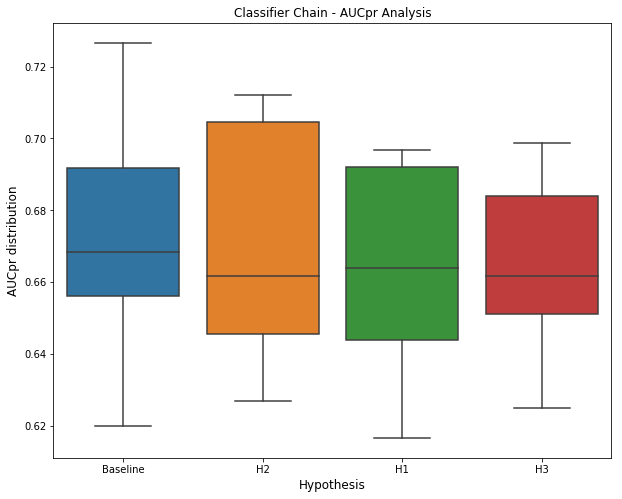

In [6]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='Algorithm',data=dataBinary)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Hypothesis",size=12)
plt.title("Classifier Chain - AUCpr Analysis", size=12)
plt.show()


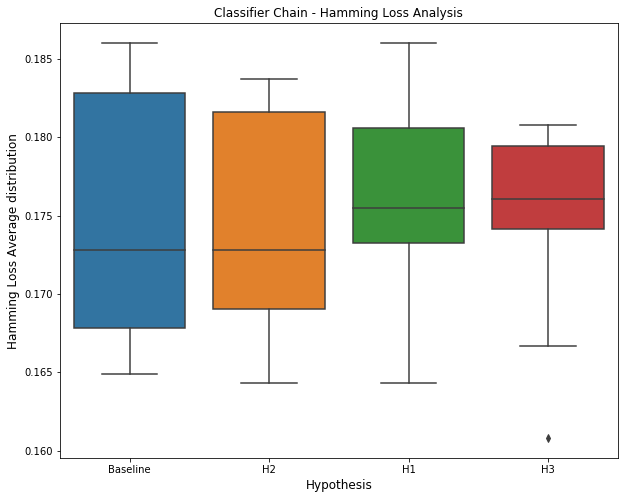

In [7]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='Algorithm',data=dataBinary)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Hypothesis",size=12)
plt.title("Classifier Chain - Hamming Loss Analysis", size=12)
plt.show()

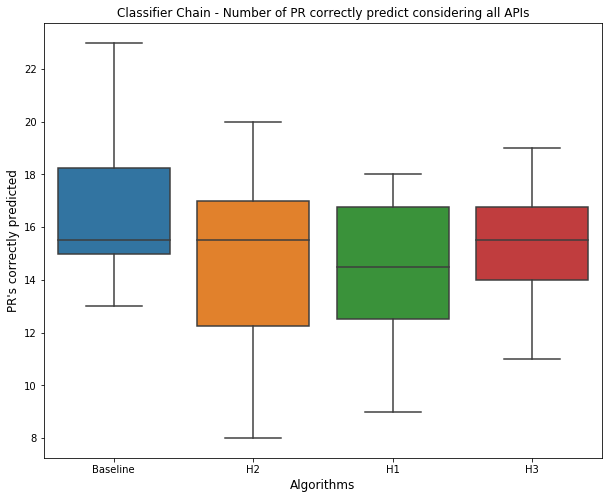

In [8]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='Algorithm',data=dataBinary)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Classifier Chain - Number of PR correctly predict considering all APIs", size=12)
plt.show()

In [9]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [10]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [11]:
#Subsetting data to compute Stats

RF_binary = dataBinary[dataBinary.Algorithm == 'RandomForest']
RF_FMeasure = RF_binary['Fmeasure_Score']

LogisticRegression_binary = dataBinary[dataBinary.Algorithm == 'LogisticRegression']
LogisticRegression_FMeasure = LogisticRegression_binary['Fmeasure_Score']

MLPC_binary = dataBinary[dataBinary.Algorithm == 'MLPClassifier']
MLPC_FMeasure = MLPC_binary['Fmeasure_Score']

DT_binary = dataBinary[dataBinary.Algorithm == 'DecisionTree']
DT_FMeasure = DT_binary['Fmeasure_Score']

MlkNN_binary = dataBinary[dataBinary.Algorithm == 'MLkNN']
MlkNN_FMeasure = MlkNN_binary['Fmeasure_Score']




In [12]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_FMeasure,LogisticRegression_FMeasure, MLPC_FMeasure,DT_FMeasure,MlkNN_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=nan, p=nan
Different distributions (reject H0)


In [13]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_FMeasure,LogisticRegression_FMeasure,MLPC_FMeasure,DT_FMeasure,MlkNN_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


ZeroDivisionError: division by zero

In [14]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(RF_FMeasure, LogisticRegression_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(RF_FMeasure, LogisticRegression_FMeasure))
print(cliffsDelta(RF_FMeasure, MLPC_FMeasure))
print(cliffsDelta(RF_FMeasure, DT_FMeasure))
print(cliffsDelta(RF_FMeasure, MlkNN_FMeasure)) #divisionByZero error

#Effect_Size LogisticRegression Vs others
print(cliffsDelta(LogisticRegression_FMeasure, MLPC_FMeasure))
print(cliffsDelta(LogisticRegression_FMeasure, DT_FMeasure))
print(cliffsDelta(LogisticRegression_FMeasure, MlkNN_FMeasure))

#Effect_Size MLPC Vs others
print(cliffsDelta(MLPC_FMeasure, DT_FMeasure))
print(cliffsDelta(MLPC_FMeasure, MlkNN_FMeasure))

#Effect_Size MlkNN Vs others
print(cliffsDelta(MlkNN_FMeasure,DT_FMeasure))


Statistics=0.000, p=0.000
Different distribution (reject H0)


/Users/fd252/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5700: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


UnboundLocalError: local variable 'j' referenced before assignment

In [15]:
#Effect_Size RandomForest Vs others   
print('Cohens d: %.3f' % cohend(RF_FMeasure, LogisticRegression_FMeasure))    
print('Cohens d: %.3f' % cohend(RF_FMeasure, MLPC_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, DT_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, MlkNN_FMeasure))

#Effect_Size LogisticRegression Vs others
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MLPC_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MlkNN_FMeasure))    

#Effect_Size MLPC Vs others
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, MlkNN_FMeasure))    

#Effect_Size MlkNN Vs others
print('Cohens d: %.3f' % cohend(MlkNN_FMeasure,DT_FMeasure))    

Cohens d: nan
Cohens d: nan
Cohens d: nan
Cohens d: nan
Cohens d: nan
Cohens d: nan
Cohens d: nan
Cohens d: nan
Cohens d: nan
Cohens d: nan


In [16]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [17]:
###Precision analysis
#Subsetting data to compute Stats

RF_binary = dataBinary[dataBinary.Algorithm == 'RandomForest']
RF_Precision = RF_binary['Precision']

LogisticRegression_binary = dataBinary[dataBinary.Algorithm == 'LogisticRegression']
LogisticRegression_Precision = LogisticRegression_binary['Precision']

MLPC_binary = dataBinary[dataBinary.Algorithm == 'MLPClassifier']
MLPC_Precision = MLPC_binary['Precision']

DT_binary = dataBinary[dataBinary.Algorithm == 'DecisionTree']
DT_Precision = DT_binary['Precision']

MlkNN_binary = dataBinary[dataBinary.Algorithm == 'MLkNN']
MlkNN_Precision = MlkNN_binary['Precision']

In [18]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(RF_FMeasure, LogisticRegression_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(RF_Precision, LogisticRegression_Precision))
print(cliffsDelta(RF_Precision, MLPC_Precision))
print(cliffsDelta(RF_Precision, DT_Precision))
print(cliffsDelta(RF_Precision, MlkNN_Precision)) #divisionByZero error

#Effect_Size LogisticRegression Vs others
print(cliffsDelta(LogisticRegression_Precision, MLPC_Precision))
print(cliffsDelta(LogisticRegression_Precision, DT_Precision))
print(cliffsDelta(LogisticRegression_Precision, MlkNN_Precision))

#Effect_Size MLPC Vs others
print(cliffsDelta(MLPC_Precision, DT_Precision))
print(cliffsDelta(MLPC_Precision, MlkNN_Precision))

#Effect_Size MlkNN Vs others
print(cliffsDelta(MlkNN_Precision,DT_Precision))


Statistics=0.000, p=0.000
Different distribution (reject H0)


UnboundLocalError: local variable 'j' referenced before assignment

In [19]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=nan, p=nan
Different distributions (reject H0)


In [20]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

ZeroDivisionError: division by zero